In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [2]:
# set random seed
seed(42)
from tensorflow import random
random.set_seed(42)

In [3]:
# load data
data_dir = r"C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set"
for dirname, _, filenames in os.walk(r"C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.10.52.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.02.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.12.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.22.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.32.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.42.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.11.52.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.12.02.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.12.12.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_set\2004.02.12.12.22.39
C:\Users\hp\Desktop\Anomlay Detection\Sensor Data From Bearings\Data_s

In [4]:
#Feature Engineering
# average and merge sensor samples
df = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    df = df.append(dataset_mean_abs)
    
df.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dataset_mean_abs)
C:\Users\hp\AppData\Local\Temp\ipykernel_17172\3835274144.py:10: Fut

In [5]:
# transform data file index to datetime and sort in chronological order
df.index = pd.to_datetime(df.index, format='%Y.%m.%d.%H.%M.%S')
df = df.sort_index()
df.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (982, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2004-02-12 10:52:39 to 2004-02-19 06:22:39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bearing 1  982 non-null    float64
 1   Bearing 2  982 non-null    float64
 2   Bearing 3  982 non-null    float64
 3   Bearing 4  982 non-null    float64
dtypes: float64(4)
memory usage: 38.4 KB


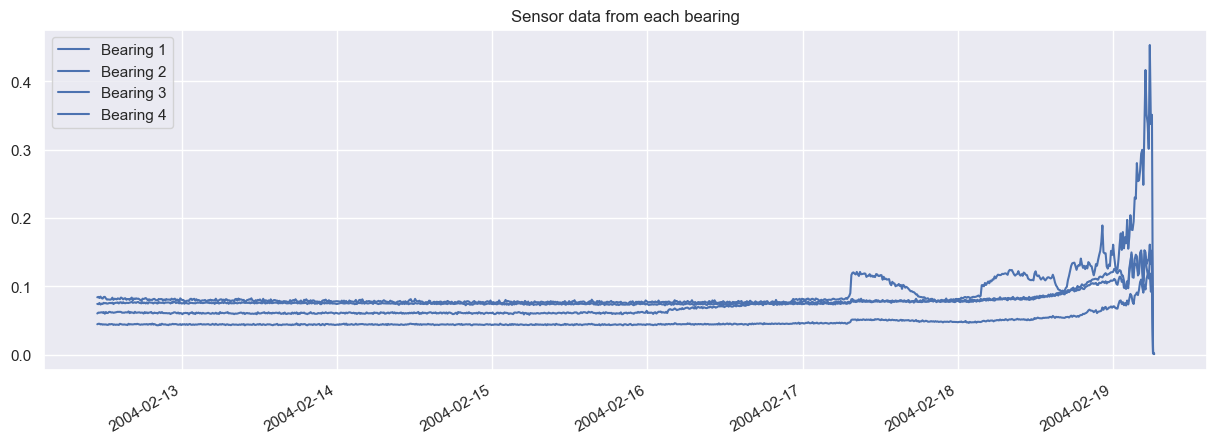

In [15]:
import seaborn as sns
color_pal = sns.color_palette()
df.plot(
        figsize=(15, 5),
        color=color_pal[0],
        title='Sensor data from each bearing')
plt.show()

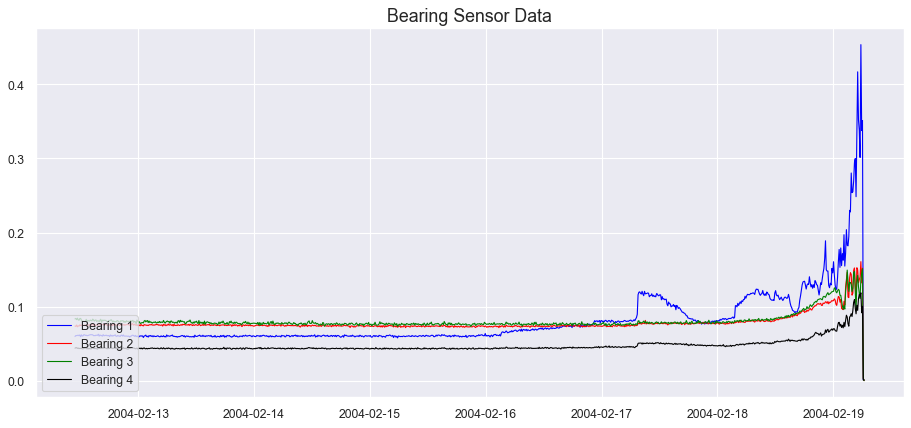

In [16]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(df['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(df['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(df['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(df['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

In [8]:
df.index.min(), df.index.max()

(Timestamp('2004-02-12 10:52:39'), Timestamp('2004-02-19 06:22:39'))

In [9]:
train = df.loc[df.index < '2004-02-17 12:52:39']
test = df.loc[df.index >= '2004-02-17 12:52:39']

# train =df['2004-02-12 10:52:39': '2004-02-15 12:52:39']
# test = df['2004-02-15 12:52:39':]

In [10]:
train.shape


(732, 4)

In [11]:
test.shape

(250, 4)

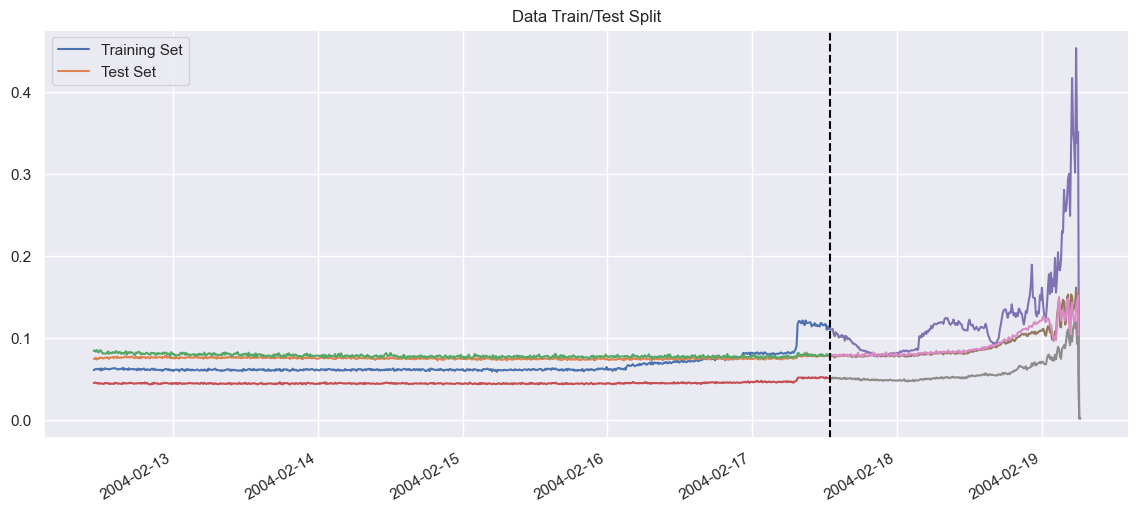

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2004-02-17 12:52:39', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

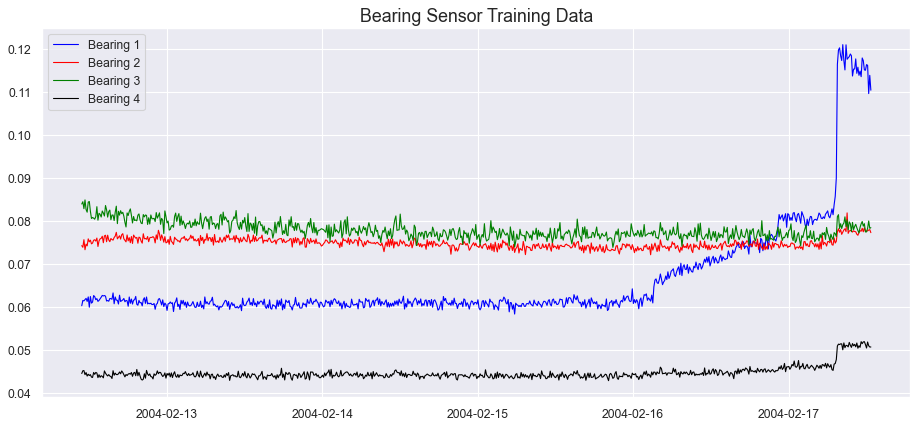

In [20]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

In [18]:
#Applying Fourier Transforms:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

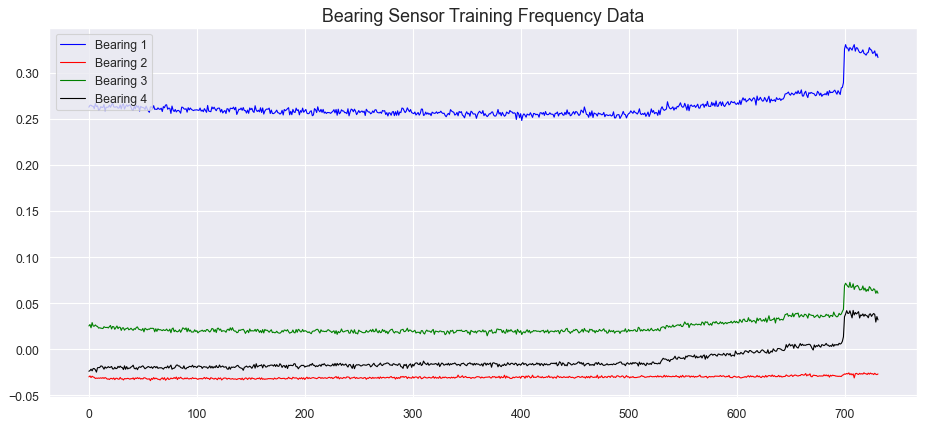

In [22]:
#frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
plt.show()

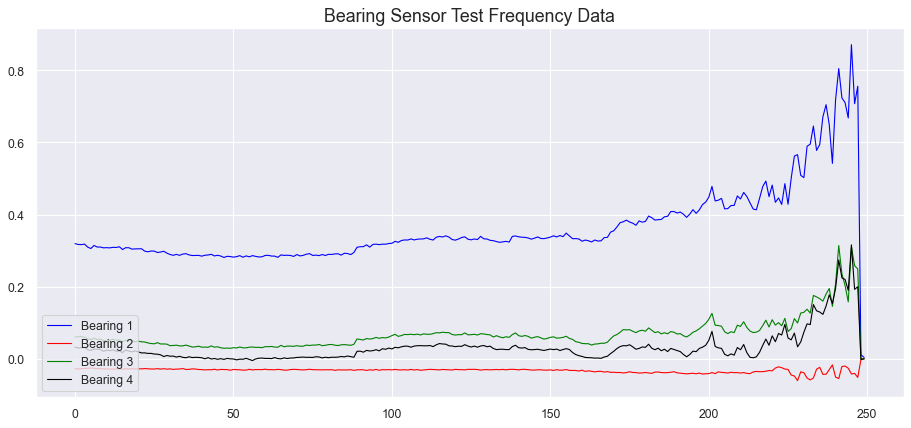

In [24]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()

In [25]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [26]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (732, 1, 4)
Test data shape: (250, 1, 4)


In [27]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [28]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1344      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [29]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
70/70 [==============================] - 6s 15ms/step - loss: 0.1810 - val_loss: 0.5766
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.1046 - val_loss: 0.4556
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0806 - val_loss: 0.4288
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0736 - val_loss: 0.4384
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0613 - val_loss: 0.4540
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0576 - val_loss: 0.4471
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 0.4622
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.4571
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.4459
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0547 - val_loss: 0.4556
Epoch 11

70/70 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.2673
Epoch 84/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.2621
Epoch 85/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.2579
Epoch 86/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0277 - val_loss: 0.2581
Epoch 87/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.2533
Epoch 88/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.2443
Epoch 89/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.2356
Epoch 90/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.2368
Epoch 91/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.2338
Epoch 92/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.2301
Epoch 93/100


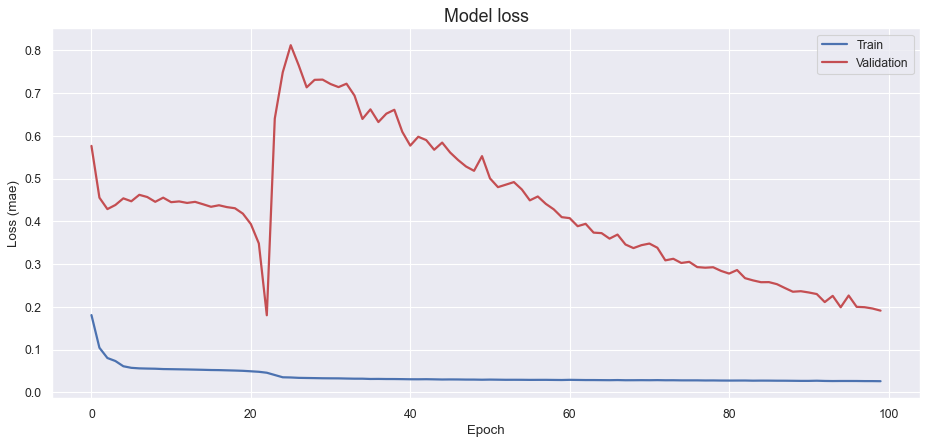

In [30]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

23/23 [==============================] - 1s 2ms/step


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

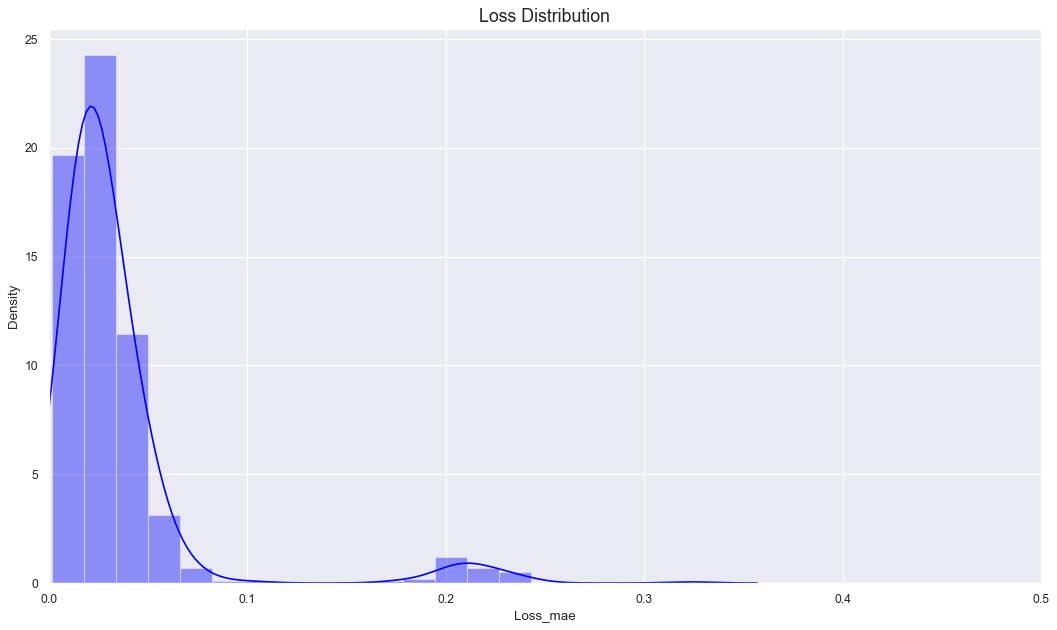

In [31]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [32]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.275
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

8/8 [==============================] - 0s 3ms/step


,Loss_mae,Threshold,Anomaly
2004-02-17 12:52:39,0.219882,0.275,False
2004-02-17 13:02:39,0.192273,0.275,False
2004-02-17 13:12:39,0.177103,0.275,False
2004-02-17 13:22:39,0.209657,0.275,False
2004-02-17 13:32:39,0.152203,0.275,False


In [33]:
# calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.275
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

23/23 [==============================] - 0s 2ms/step


<AxesSubplot:>

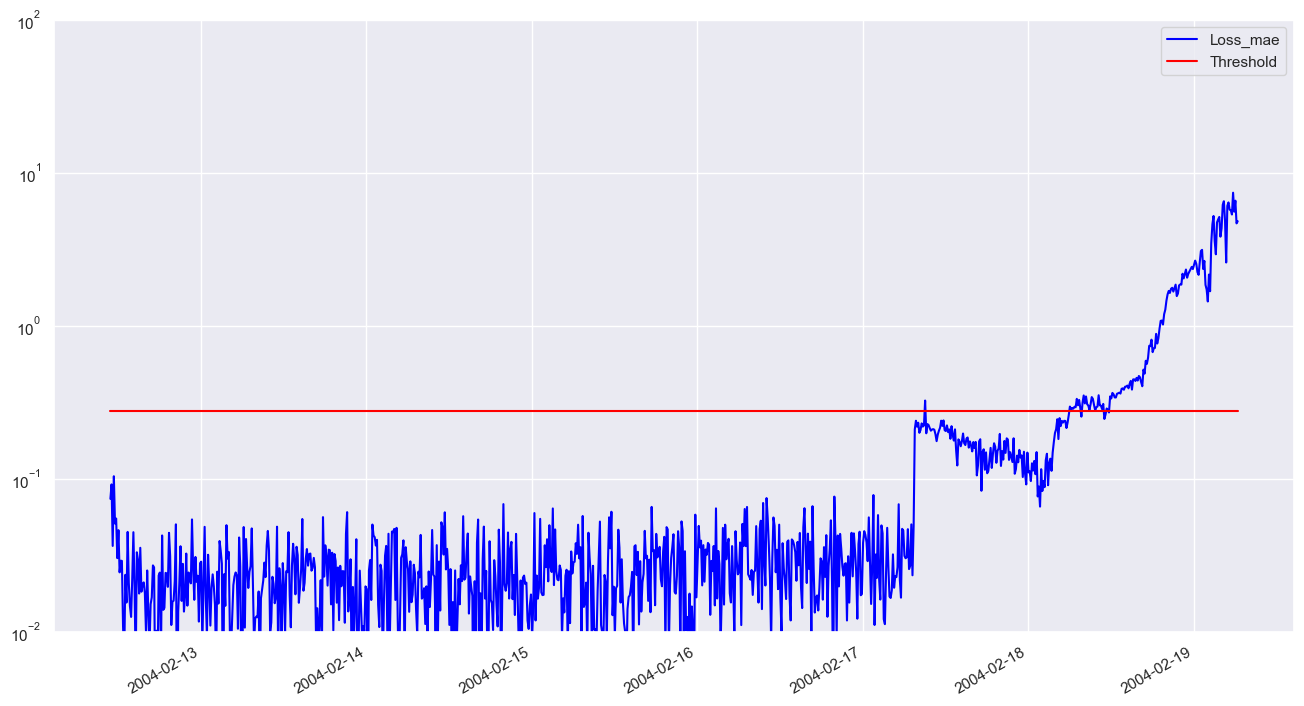

In [34]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])